# lbph(local binary pattern histogram)

in the local binary pattern histogram we the algo work's on that pattern of the pixal 
first it is used to compair the pixal to the celtral of the pixal and based of the value of the central pixal valure this are used to compaire and are used to set the reduced number

|  |  |  |
|--|--|--|
|12|15|18|
|5 |8 | 3|
|8 |1 |2 |

for example 
here the central value of the pixal is 8 so here we will take it and will reduce this value to the other pixal to get the pattern

if pixal_value>=8:1

if pixal_value<8:0

now we will get this pattern  now

|  |  |  |
|--|--|--|
|1 |1 |1 |
|0 |8 |0 |
|1 |0 |0 |

now the pattern will be <code>11100010</code>

here the brightness does not impact to get this pattern may be due to brightness the value of the pixal can be more but after this method will get the same result here
like if the brightness of the image is more so may be we got this value of per pixal 

|  |  |  |
|--|--|--|
|42|55|48|
|35|38|33|
|38|30|32|

after applying this method again we will get the same result as we got in the previous one

|  |  |  |
|--|--|--|
|1 |1 |1 |
|0 |8 |0 |
|1 |0 |0 |

now the pattern will be <code>11100010</code>

In [1]:
# !pip3 install opencv-contrib-python==4.4.0.46
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

let say we have the image of the face so here the algo will create the several squares of the image 
and here this will create histogram of each sqare of the pixal and it will happend with multiple sqare and based of the histogram the algo will understand the shape of the face, color of the eye,and so on.

In [2]:
import zipfile
path = './yalefaces.zip'

In [3]:
zip_object = zipfile.ZipFile(file= path, mode= 'r')
zip_object.extractall('./abc/')
zip_object.close()

## preprocessing the image

In [4]:
import os
print(os.listdir('./abc/yalefaces/'))

['subject393.png', 'subject12.noglasses', 'subject69.png', 'subject337.png', 'subject352.png', 'subject47.png', 'subject04.centerlight', 'subject351.png', 'subject138.png', 'subject247.png', 'subject11.glasses', 'subject408.png', 'subject263.png', 'subject450.png', 'subject374.png', 'subject272.png', 'subject199.png', 'subject187.png', 'subject165.png', 'subject456.png', 'subject05.glasses', 'subject295.png', 'subject04.noglasses', 'subject14.rightlight', 'subject216.png', 'subject304.png', 'subject115.png', 'subject402.png', 'subject123.png', 'subject274.png', 'subject398.png', 'subject12.happy', 'subject309.png', 'subject357.png', 'subject13.normal', 'subject424.png', 'subject88.png', 'subject371.png', 'subject193.png', 'subject108.png', 'subject134.png', 'subject441.png', 'subject365.png', 'subject346.png', 'subject06.glasses', 'subject445.png', 'subject09.centerlight', 'subject159.png', 'subject74.png', 'subject302.png', 'subject269.png', 'subject13.sad', 'subject451.png', 'subject

In [5]:
import pathlib
from PIL import Image
# function to return the file extension
# file_extension = pathlib.Path('my_file.txt').suffix
def get_image_dagta():
    paths = [os.path.join(os.path.join(os.getcwd(),'abc/yalefaces'),f) for f in os.listdir(os.path.join(os.getcwd(),'abc/yalefaces'))]
    face = []
    ids = []
    for count, path in enumerate(paths):
#         print(path)
        if 'subject' in path.lower():
            pa = os.path.join(os.path.join(os.path.join(os.getcwd(),'abc'),'yalefaces'),path)
            n1 = os.path.join(os.path.join(os.getcwd(),'abc'),'yalefaces/')
            print(pa, n1, path)
            ext = str(os.rename(path, str(n1) +str('subject'+str(count)+'.png')))
#             image = Image.open(ext).convert('L')
#             image_np = np.array(image, 'uint8')
#             s = int(str((os.path.split(path)[1].lower()).split('.')[0]).replace('subject',''))
#             ids.append(s)
#             face.append(image_np)
#     return np.array(ids), face

In [6]:
get_image_dagta()

/home/cis/Desktop/opencv/abc/yalefaces/subject393.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject393.png
/home/cis/Desktop/opencv/abc/yalefaces/subject12.noglasses /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject12.noglasses
/home/cis/Desktop/opencv/abc/yalefaces/subject69.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject69.png
/home/cis/Desktop/opencv/abc/yalefaces/subject337.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject337.png
/home/cis/Desktop/opencv/abc/yalefaces/subject352.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject352.png
/home/cis/Desktop/opencv/abc/yalefaces/subject47.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject47.png
/home/cis/Desktop/opencv/abc/yalefaces/subject04.centerlight /home/cis/Desktop/opencv/abc/yalefaces/ /home

/home/cis/Desktop/opencv/abc/yalefaces/subject01.rightlight /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject01.rightlight
/home/cis/Desktop/opencv/abc/yalefaces/subject256.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject256.png
/home/cis/Desktop/opencv/abc/yalefaces/subject364.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject364.png
/home/cis/Desktop/opencv/abc/yalefaces/subject271.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject271.png
/home/cis/Desktop/opencv/abc/yalefaces/subject239.png /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject239.png
/home/cis/Desktop/opencv/abc/yalefaces/subject04.rightlight /home/cis/Desktop/opencv/abc/yalefaces/ /home/cis/Desktop/opencv/abc/yalefaces/subject04.rightlight
/home/cis/Desktop/opencv/abc/yalefaces/subject267.png /home/cis/Desktop/opencv/abc/yalef

In [7]:
for i in os.listdir('./abc/yalefaces/'):
    print(os.path.join('./abc/yalefaces/',i))

./abc/yalefaces/subject393.png
./abc/yalefaces/subject69.png
./abc/yalefaces/subject337.png
./abc/yalefaces/subject352.png
./abc/yalefaces/subject47.png
./abc/yalefaces/subject351.png
./abc/yalefaces/subject138.png
./abc/yalefaces/subject247.png
./abc/yalefaces/subject408.png
./abc/yalefaces/subject263.png
./abc/yalefaces/subject450.png
./abc/yalefaces/subject374.png
./abc/yalefaces/subject272.png
./abc/yalefaces/subject199.png
./abc/yalefaces/subject187.png
./abc/yalefaces/subject165.png
./abc/yalefaces/subject456.png
./abc/yalefaces/subject295.png
./abc/yalefaces/subject216.png
./abc/yalefaces/subject304.png
./abc/yalefaces/subject115.png
./abc/yalefaces/subject402.png
./abc/yalefaces/subject123.png
./abc/yalefaces/subject274.png
./abc/yalefaces/subject398.png
./abc/yalefaces/subject309.png
./abc/yalefaces/subject357.png
./abc/yalefaces/subject424.png
./abc/yalefaces/subject88.png
./abc/yalefaces/subject371.png
./abc/yalefaces/subject193.png
./abc/yalefaces/subject108.png
./abc/yalef

./abc/yalefaces/subject46.png
./abc/yalefaces/subject455.png
./abc/yalefaces/subject77.png
./abc/yalefaces/subject112.png
./abc/yalefaces/subject361.png
./abc/yalefaces/subject96.png
./abc/yalefaces/subject90.png
./abc/yalefaces/subject118.png
./abc/yalefaces/subject117.png
./abc/yalefaces/subject114.png
./abc/yalefaces/subject63.png
./abc/yalefaces/subject78.png
./abc/yalefaces/subject25.png
./abc/yalefaces/subject57.png


In [8]:
# import glob 
# paths = []
# for i in glob.glob('./abc/yalefaces/*'):
#     paths.append(i)
# for path in paths:
#     image = (Image.open(i).convert('L'))
#     print(image)
# #     image_np = np.array(image, 'uint8')
# #     s = int(str((os.path.split(path)[1].lower()).split('.')[0]).replace('subject',''))

In [9]:
# import os 
# glob.glob('')
# os.remove()

In [10]:
!pip3 install pillow
import glob 
def get_image_data():
    paths = []
#     paths = [os.path.join('./abc/yalefaces/',i) for i in os.listdir('./abc/yalefaces/')]
    for i in glob.glob('./abc/yalefaces/*.png'):
        paths.append(i)
    face = []
    ids = []
    for path in paths:
        p = os.path.join(os.getcwd(),path[2:])
        print(p)
        image = Image.open(p).convert('L')
        image_np = np.array(image, 'uint8')
#         image_np = np.array(cv2.cvtColor(cv2.imread(p),cv2.COLOR_BGR2GRAY), 'uint8')
        s = int(str((os.path.split(path)[1].lower()).split('.')[0]).replace('subject',''))
        
        ids.append(s)
        face.append(image_np)
    return np.array(ids), face



In [11]:
id , face = get_image_data()

/home/cis/Desktop/opencv/abc/yalefaces/subject393.png
/home/cis/Desktop/opencv/abc/yalefaces/subject69.png
/home/cis/Desktop/opencv/abc/yalefaces/subject337.png
/home/cis/Desktop/opencv/abc/yalefaces/subject352.png
/home/cis/Desktop/opencv/abc/yalefaces/subject47.png
/home/cis/Desktop/opencv/abc/yalefaces/subject351.png
/home/cis/Desktop/opencv/abc/yalefaces/subject138.png
/home/cis/Desktop/opencv/abc/yalefaces/subject247.png
/home/cis/Desktop/opencv/abc/yalefaces/subject408.png
/home/cis/Desktop/opencv/abc/yalefaces/subject263.png
/home/cis/Desktop/opencv/abc/yalefaces/subject450.png
/home/cis/Desktop/opencv/abc/yalefaces/subject374.png
/home/cis/Desktop/opencv/abc/yalefaces/subject272.png
/home/cis/Desktop/opencv/abc/yalefaces/subject199.png
/home/cis/Desktop/opencv/abc/yalefaces/subject187.png
/home/cis/Desktop/opencv/abc/yalefaces/subject165.png
/home/cis/Desktop/opencv/abc/yalefaces/subject456.png
/home/cis/Desktop/opencv/abc/yalefaces/subject295.png
/home/cis/Desktop/opencv/abc/y

/home/cis/Desktop/opencv/abc/yalefaces/subject152.png
/home/cis/Desktop/opencv/abc/yalefaces/subject137.png
/home/cis/Desktop/opencv/abc/yalefaces/subject10.png
/home/cis/Desktop/opencv/abc/yalefaces/subject127.png
/home/cis/Desktop/opencv/abc/yalefaces/subject3.png
/home/cis/Desktop/opencv/abc/yalefaces/subject426.png
/home/cis/Desktop/opencv/abc/yalefaces/subject236.png
/home/cis/Desktop/opencv/abc/yalefaces/subject388.png
/home/cis/Desktop/opencv/abc/yalefaces/subject104.png
/home/cis/Desktop/opencv/abc/yalefaces/subject376.png
/home/cis/Desktop/opencv/abc/yalefaces/subject257.png
/home/cis/Desktop/opencv/abc/yalefaces/subject128.png
/home/cis/Desktop/opencv/abc/yalefaces/subject258.png
/home/cis/Desktop/opencv/abc/yalefaces/subject294.png
/home/cis/Desktop/opencv/abc/yalefaces/subject414.png
/home/cis/Desktop/opencv/abc/yalefaces/subject394.png
/home/cis/Desktop/opencv/abc/yalefaces/subject243.png
/home/cis/Desktop/opencv/abc/yalefaces/subject284.png
/home/cis/Desktop/opencv/abc/ya

/home/cis/Desktop/opencv/abc/yalefaces/subject60.png
/home/cis/Desktop/opencv/abc/yalefaces/subject4.png
/home/cis/Desktop/opencv/abc/yalefaces/subject42.png
/home/cis/Desktop/opencv/abc/yalefaces/subject18.png
/home/cis/Desktop/opencv/abc/yalefaces/subject46.png
/home/cis/Desktop/opencv/abc/yalefaces/subject455.png
/home/cis/Desktop/opencv/abc/yalefaces/subject77.png
/home/cis/Desktop/opencv/abc/yalefaces/subject112.png
/home/cis/Desktop/opencv/abc/yalefaces/subject361.png
/home/cis/Desktop/opencv/abc/yalefaces/subject96.png
/home/cis/Desktop/opencv/abc/yalefaces/subject90.png
/home/cis/Desktop/opencv/abc/yalefaces/subject118.png
/home/cis/Desktop/opencv/abc/yalefaces/subject117.png
/home/cis/Desktop/opencv/abc/yalefaces/subject114.png
/home/cis/Desktop/opencv/abc/yalefaces/subject63.png
/home/cis/Desktop/opencv/abc/yalefaces/subject78.png
/home/cis/Desktop/opencv/abc/yalefaces/subject25.png
/home/cis/Desktop/opencv/abc/yalefaces/subject57.png


In [12]:
# 'abc/yalefaces/Readme.txt'[-3:]!= 'txt'

In [13]:
len(face)

368

In [14]:
len(id)

368

In [15]:
face[0], face[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 230, 244, 245],
        [255, 255, 255, ..., 203, 210, 223],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [16]:
243 * 320

77760

# training the LBPH classifier

In [17]:
# !pip uninstall opencv-python
# !pip3 install opencv-contrib-python
# !pip install opencv-contrib-python --upgrade

In [18]:
# to run face and lbphfacerecognizer we need to install this version 
import cv2
#create our LBPH face recognizer 
import cv2 as cv
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(face,id)
face_recognizer.write('./lbph_classifier.yml')
for i in dir(cv2):
    if i == 'face':
        print('yes')

yes


In [19]:
a, b = face[0].shape

In [20]:
a * b

77760

In [21]:
lbph_face_recognizer = cv.face.LBPHFaceRecognizer_create()
lbph_face_recognizer.read('./lbph_classifier.yml')

In [22]:
# test_image = '/home/cis/Desktop/opencv/abc/yalefaces/subject84.png'
test_image = '/home/cis/Desktop/opencv/yalefaces/yalefaces/subject01.glasses.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [23]:
image_np.shape

(243, 320)

In [24]:
predict = lbph_face_recognizer.predict(image_np)
predict

(108, 0.0)

In [25]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

1

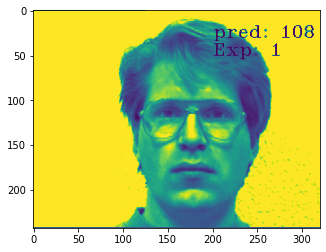

In [26]:
cv2.putText(image_np, str("pred: "+str(predict[0])),(200, 30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(image_np, str("Exp: "+str(expected_output)),(200, 50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
# cv2.imshow('pic',image_np)
plt.imshow(image_np)

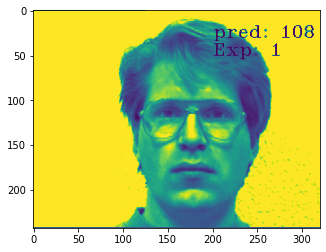

In [27]:
plt.imshow(image_np)

In [28]:
import glob
# paths = [os.path.join('./abc/yalefaces/',i) for i in os.listdir('./abc/yalefaces/')]
paths2 = []
for i in glob.glob('./abc/yalefaces/*.png'):
    paths2.append(i)
predictions = []
expected_outputs = []
print(paths2)
for path in paths2:
    image = Image.open(path).convert('L')
    image_np  = np.array(image,'uint8')
    prediction, _ =  lbph_face_recognizer.predict(image_np)
    expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    predictions.append(prediction)
    expected_outputs.append(expected_output)
    
#     print(path)

['./abc/yalefaces/subject393.png', './abc/yalefaces/subject69.png', './abc/yalefaces/subject337.png', './abc/yalefaces/subject352.png', './abc/yalefaces/subject47.png', './abc/yalefaces/subject351.png', './abc/yalefaces/subject138.png', './abc/yalefaces/subject247.png', './abc/yalefaces/subject408.png', './abc/yalefaces/subject263.png', './abc/yalefaces/subject450.png', './abc/yalefaces/subject374.png', './abc/yalefaces/subject272.png', './abc/yalefaces/subject199.png', './abc/yalefaces/subject187.png', './abc/yalefaces/subject165.png', './abc/yalefaces/subject456.png', './abc/yalefaces/subject295.png', './abc/yalefaces/subject216.png', './abc/yalefaces/subject304.png', './abc/yalefaces/subject115.png', './abc/yalefaces/subject402.png', './abc/yalefaces/subject123.png', './abc/yalefaces/subject274.png', './abc/yalefaces/subject398.png', './abc/yalefaces/subject309.png', './abc/yalefaces/subject357.png', './abc/yalefaces/subject424.png', './abc/yalefaces/subject88.png', './abc/yalefaces

In [29]:
type(predictions)

list

In [30]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [31]:
predictions

array([393,  69, 337, 352,  47, 351, 138, 247, 408, 263, 450, 374, 272,
       199, 187, 165, 456, 295, 216, 304, 115, 402, 123, 274, 398, 123,
       357, 424,  88, 371, 193, 108, 134, 441, 365, 346, 445, 123,  74,
       302, 216, 451,  94, 340, 187,  19, 374, 196, 140, 355, 452, 452,
        84, 163,  55, 164, 158, 224, 144,  94, 312, 101, 247, 374, 217,
       142, 297, 383, 428, 138, 166, 155, 409, 441, 333, 395, 255, 125,
         2, 274, 147, 222, 342, 383, 312,  55, 433, 372,  14,  45, 153,
       312, 462, 225, 134,  67, 135, 393, 310, 163, 218, 304, 216, 144,
       228, 357, 333,  14, 290, 400,  73,  56, 413, 263, 346, 186, 346,
       108,  12, 125, 224, 202, 204, 351, 366, 316, 288, 342, 462, 440,
       451,  44, 342,  35, 299,  76,  37, 123, 138, 255,  73, 135, 216,
       304, 164, 399,  12, 208,  61,  80,  76, 100, 264, 193, 460, 234,
       195, 450, 422, 274, 413, 134, 413, 225, 332, 209, 225,  12, 401,
       108,  68,  83, 409,   2, 362, 344, 440, 377, 365, 228,  6

In [32]:
expected_outputs

array([393,  69, 337, 352,  47, 351, 138, 247, 408, 263, 450, 374, 272,
       199, 187, 165, 456, 295, 216, 304, 115, 402, 123, 274, 398, 309,
       357, 424,  88, 371, 193, 108, 134, 441, 365, 346, 445, 159,  74,
       302, 269, 451,  94, 340, 447,  19, 174, 196, 140, 355, 452, 368,
        84, 163,  55, 164, 158, 224, 144, 180, 312, 101, 347, 457, 217,
       142, 297, 383, 428, 198, 166, 155, 409, 370, 333, 395, 255, 125,
         2,  50, 147, 222, 342, 326, 244, 168, 433, 372,  14,  45, 153,
       282, 462, 225, 289,  67, 135, 379, 310, 385, 218, 446, 120, 387,
       228,   7, 384,  51, 290, 400,  73,  56, 413, 411, 301, 186, 329,
        30,  12, 266, 412, 202, 204, 323, 366, 316, 288, 449,  28, 440,
       262,  44, 443,  35, 299,  76,  37, 259,   1, 405, 176, 160,  95,
        15, 330, 399, 270, 208,  61,  80, 231, 100, 264,  16, 460, 234,
       195, 121, 422,   5, 444, 273, 367, 429, 332, 209, 191, 287, 401,
        59,  68,  83, 350,  81, 362, 344, 190, 377,  33,  24,  6

In [33]:
# !pip3 install sklearn

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.42391304347826086

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [36]:
# !pip install seaborn

In [37]:
# import seaborn
# seaborn.heatmap(cm,annot=True)

# LBPH parameter

here we are going to learn some parameter of the LBPH. So we can set then in order to try to improve the results, the first one is called radials.

1. radius
2. Neighbors
3. grid_x adn grid_y
4. Threshold

###### here we are trying to increase the prediction 

In [38]:
# # radius: 1
# # neighbors: 8
# # grid_x: 8
# # grid_y: 8
# face_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=8,neighbors =14, grid_x = 10, grid_y = 10)
# face_recognizer.train(face,id)
# face_recognizer.write('./lbph_classifier1.yml')

In [39]:
# lbph_face_recognizer = cv.face.LBPHFaceRecognizer_create()
# lbph_face_recognizer.read('./lbph_classifier1.yml')
# # test_image = '/home/cis/Desktop/opencv/abc/yalefaces/subject84.png'
# test_image = '/home/cis/Desktop/opencv/yalefaces/yalefaces/subject01.glasses.gif'
# image = Image.open(test_image).convert('L')
# image_np = np.array(image, 'uint8')
# predict = lbph_face_recognizer.predict(image_np)
# predict
# import glob
# # paths = [os.path.join('./abc/yalefaces/',i) for i in os.listdir('./abc/yalefaces/')]
# paths2 = []
# for i in glob.glob('./abc/yalefaces/*.png'):
#     paths2.append(i)
# predictions = []
# expected_outputs = []
# for path in paths2:
#     image = Image.open(path).convert('L')
#     image_np  = np.array(image,'uint8')
#     prediction, _ =  lbph_face_recognizer.predict(image_np)
#     expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
#     predictions.append(prediction)
#     expected_outputs.append(expected_output)
    
# #     print(path)
# from sklearn.metrics import accuracy_score
# accuracy_score(expected_outputs,predictions)

In [40]:
# !pip3 install cmake
# !pip3 install dlib
import cv2

In [60]:
import sys
import os
import dlib
import glob

In [61]:
predictor_path = './shape_predictor_81_face_landmarks.dat'

In [62]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor(predictor_path)

In [63]:
image = cv2.imread('./transformation_example.bmp')

In [64]:
face_detection = face_detector(image, 1)
for face in face_detection:
    points = points_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y),2,(0,255,255),2)
        
#     print(points)
#     print((points.parts()))
    l, t,r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l,t),(r,b),(0, 255, 255),2)

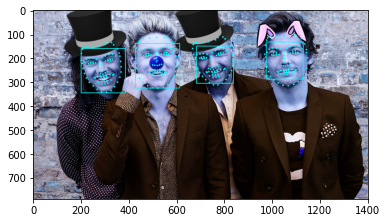

In [65]:
import matplotlib.pyplot as plt
plt.imshow(image)